# 4.Self-study the framework of "beautifulsoup". Grab the housing data from Pararius, store the data in the housing.csv file, and analyse the file data. 

### a. Create a dataframe called housing.

In [1]:
#Grab data from pararius.com
'''
from bs4 import BeautifulSoup
import requests
from csv import writer

url = 'https://www.pararius.com/apartments/nederland/page-'

with open("house_info.csv", 'w', encoding='utf8', newline='') as f:
    thewriter = writer(f)
    header = ['Title', 'Location', 'Price', 'Area', 'Room']
    thewriter.writerow(header)

    for page in range(1,184):

        req = requests.get(url + str(page))
        soup = BeautifulSoup(req.content, 'html.parser')
        lists = soup.find_all('section', class_="listing-search-item")
        
        for list in lists:
            title = list.find("a", class_="listing-search-item__link--title").text.strip()
            location = list.find("div", class_="listing-search-item__location").text.strip()
            price = list.find("span", class_="listing-search-item__price").text.strip()
            living_area = list.find("span", class_="illustrated-features__description").text.strip()
            room = list.find("span", class_="illustrated-features__description").text.strip()
            info = [title, location, price, living_area, room]
            print(info)
            thewriter.writerow(info)
            '''

'\nfrom bs4 import BeautifulSoup\nimport requests\nfrom csv import writer\n\nurl = \'https://www.pararius.com/apartments/nederland/page-\'\n\nwith open("house_info.csv", \'w\', encoding=\'utf8\', newline=\'\') as f:\n    thewriter = writer(f)\n    header = [\'Title\', \'Location\', \'Price\', \'Area\', \'Room\']\n    thewriter.writerow(header)\n\n    for page in range(1,184):\n\n        req = requests.get(url + str(page))\n        soup = BeautifulSoup(req.content, \'html.parser\')\n        lists = soup.find_all(\'section\', class_="listing-search-item")\n        \n        for list in lists:\n            title = list.find("a", class_="listing-search-item__link--title").text.strip()\n            location = list.find("div", class_="listing-search-item__location").text.strip()\n            price = list.find("span", class_="listing-search-item__price").text.strip()\n            living_area = list.find("span", class_="illustrated-features__description").text.strip()\n            room = list.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline
#pd.options.display.max_rows = 10000
housing = pd.read_csv('house_info.csv', index_col=None)

In [3]:
housing.shape

(5856, 5)

In [4]:
housing.head()

,Title,Location,Price,Area,Room
0,House Netelstraat 5,6413 SN Heerlen (Heerlerheide Kom),"€1,600 per month",152 m²,152 m²
1,Apartment Schouwbroekseweg,5616 NW Eindhoven (Philipsdorp),"€1,800 per month",140 m²,140 m²
2,Apartment Hereweg 30 4,9725 AD Groningen (Herewegbuurt),"€1,350 per month",113 m²,113 m²
3,Apartment de Koppele,5632 LN Eindhoven (Vaartbroek),"€1,200 per month",88 m²,88 m²
4,Apartment St Bonifaciuslaan,5643 NB Eindhoven (Burghplan),€950 per month,65 m²,65 m²


In [5]:
housing.columns

Index(['Title', 'Location', 'Price', 'Area', 'Room'], dtype='object')

In [6]:
#Change title to Apartment
housing.rename(columns={'Title':'Apartment'}, inplace=True)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Apartment  5856 non-null   object
 1   Location   5856 non-null   object
 2   Price      5856 non-null   object
 3   Area       5856 non-null   object
 4   Room       5856 non-null   object
dtypes: object(5)
memory usage: 114.4+ KB


### Data Cleaning

In [8]:
#price on request
housing[housing['Price'].str.contains(r'^Price on Request', flags=re.I, regex=True)]

,Apartment,Location,Price,Area,Room
720,House Kriekenmarkt,4201 AN Gorinchem (Bovenstad),Price on request,120 m²,120 m²
1145,Apartment Kolenstraat 16,5911 HL Venlo (Winkelcentrum),Price on request,64 m²,64 m²
1684,Apartment Zeestraat 300,1949 AG Wijk aan Zee (Wijk aan Zee),Price on request,40 m²,40 m²
1976,Apartment Peijerstraat 28,6101 GD Echt (Echt Centrum),Price on request,50 m²,50 m²
2769,Apartment Dokter van Stratenweg,4205 LS Gorinchem (Stalkaarsen),Price on request,90 m²,90 m²
3046,Apartment Heinsbergerweg 17 A1,6045 CB Roermond (Kapel-Muggenbroek),Price on request,90 m²,90 m²
3749,House Schoolstraat,9981 AN Uithuizen (Uithuizen),Price on request,130 m²,130 m²
4124,House Hooilandseweg,9983 PB Roodeschool (Roodeschool),Price on request,280 m²,280 m²
4931,House Muidenweg,4341 PZ Arnemuiden (Oranjeplaat),Price on request,50 m²,50 m²
5044,Apartment Wilhelminasingel 5,6041 CH Roermond (Binnenstad),Price on request,100 m²,100 m²


In [9]:
#remove data that contains price on request, not relevant
import re
housing = housing[~housing['Price'].str.contains(r'^Price on Request', flags=re.I, regex=True)]

In [10]:
#initial price is $1,700 per month. Remove the dollar sign, space and the words per month.

housing['Price'] = housing.apply(lambda x: str(x['Price'].replace('€', '')), axis=1)
housing['Price'] = housing.apply(lambda x: str(x['Price'].replace(',', '')), axis=1)
housing['Price'] = housing.apply(lambda x: int(x['Price'].replace(' per month', '')), axis=1)

In [11]:
#Remove m2

housing['Area'] = housing.apply(lambda x: int(x['Area'].replace(' m²', '')), axis=1)
housing['Room'] = housing.apply(lambda x: int(x['Room'].replace(' m²', '')), axis=1)

In [12]:
# Only includes the specific area location

housing['Location'] = housing['Location'].str.extract(r"\((.*?)\)", expand=False)

In [13]:
#housing['Apartment'].unique()

In [14]:
#housing['Location'].unique()

In [15]:
#housing['Price'].unique()

In [16]:
#housing['Area'].unique()

In [17]:
#housing['Room'].unique()

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5839 entries, 0 to 5855
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Apartment  5839 non-null   object
 1   Location   5839 non-null   object
 2   Price      5839 non-null   int64 
 3   Area       5839 non-null   int64 
 4   Room       5839 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 228.1+ KB


In [19]:
housing.head(5)

,Apartment,Location,Price,Area,Room
0,House Netelstraat 5,Heerlerheide Kom,1600,152,152
1,Apartment Schouwbroekseweg,Philipsdorp,1800,140,140
2,Apartment Hereweg 30 4,Herewegbuurt,1350,113,113
3,Apartment de Koppele,Vaartbroek,1200,88,88
4,Apartment St Bonifaciuslaan,Burghplan,950,65,65


In [20]:
housing.tail(5)

,Apartment,Location,Price,Area,Room
5851,House Steur,Volgerlanden-Oost,1250,106,106
5852,Apartment Rederserf,Scheveningen Badplaats,1900,90,90
5853,Apartment Amaliastraat 12 A,Voorhout,2000,120,120
5854,Apartment Wandelweg,Wormerveer Zuid,1200,60,60
5855,House Lijsterbesstraat,Bomenbuurt,1500,86,86


### b.	Query the housing location and display the average price.

In [21]:
housing['Price'].mean()

1641.2202431923274

In [22]:
housing.groupby(['Location'], as_index=False).Price.mean().sort_values('Price', ascending=False)

,Location,Price
305,De Kieviet,10725.0
52,Baambrugge Buitengebied,8500.0
1386,Verspreide huizen ten zuiden van de E3-weg,8000.0
1194,Siddeburen,7900.0
751,Kruiskerkbuurt,6000.0
...,...,...
586,Holtenbroek III,250.0
1308,Tolkamer,247.0
1301,Theereheide,240.0
1302,Theresia Midden,235.0


### c.Report the statistics of the number of apartments in different cities/villages, areas and rooms.

In [23]:
statistics = housing.groupby(['Apartment'], as_index=False).count()
statistics

,Apartment,Location,Price,Area,Room
0,Apartment 's-Gravelandse Veer 10 II,1,1,1,1
1,Apartment 's-Gravelandse Veer 8 III +PP,1,1,1,1
2,Apartment 's-Gravelandseweg 1063,1,1,1,1
3,Apartment 's-Gravelandseweg 742,1,1,1,1
4,Apartment 's-Gravelandseweg 891,1,1,1,1
...,...,...,...,...,...
4351,Studio Willemstraat,4,4,4,4
4352,Studio Witte de Withstraat,12,12,12,12
4353,Studio Wolfstraat,1,1,1,1
4354,Studio Zilverparkkade,1,1,1,1


In [24]:
housing.describe()

,Price,Area,Room
count,5839.000000,5839.000000,5839.000000
mean,1641.220243,91.697037,91.697037
std,931.461354,46.942891,46.942891
min,95.000000,8.000000,8.000000
25%,1163.500000,60.000000,60.000000
50%,1495.000000,82.000000,82.000000
75%,1850.000000,116.000000,116.000000
max,17000.000000,660.000000,660.000000


### d.	Create a bar chart to show the top 10 apartments.

In [25]:
best_price = housing.groupby(['Price', 'Apartment', 'Room', 'Area'], as_index=False).count().sort_values('Location', ascending=False)
top_10 = best_price.iloc[0:10, :]

In [26]:
top_10

,Price,Apartment,Room,Area,Location
3936,1800,Apartment Schouwbroekseweg,140,140,102
3882,1795,House Eindstraat,130,130,94
4053,1850,House Weversbaan 28 A,140,140,89
3346,1600,House Netelstraat 5,152,152,85
1869,1260,Apartment Bomanshof,63,63,10
1862,1250,Studio Eendrachtsweg,50,50,9
4983,2915,Studio Weena,65,65,5
4407,2050,Apartment Cornelis Vermuydenstraat,75,75,4
2698,1450,Studio Eendrachtsweg,50,50,4
1236,1100,Apartment Utrechtseweg,38,38,4


In [27]:
apartment_ = top_10['Apartment']
loc_ = top_10['Location']

Text(0.5, 1.0, 'Top 10 Apartments')

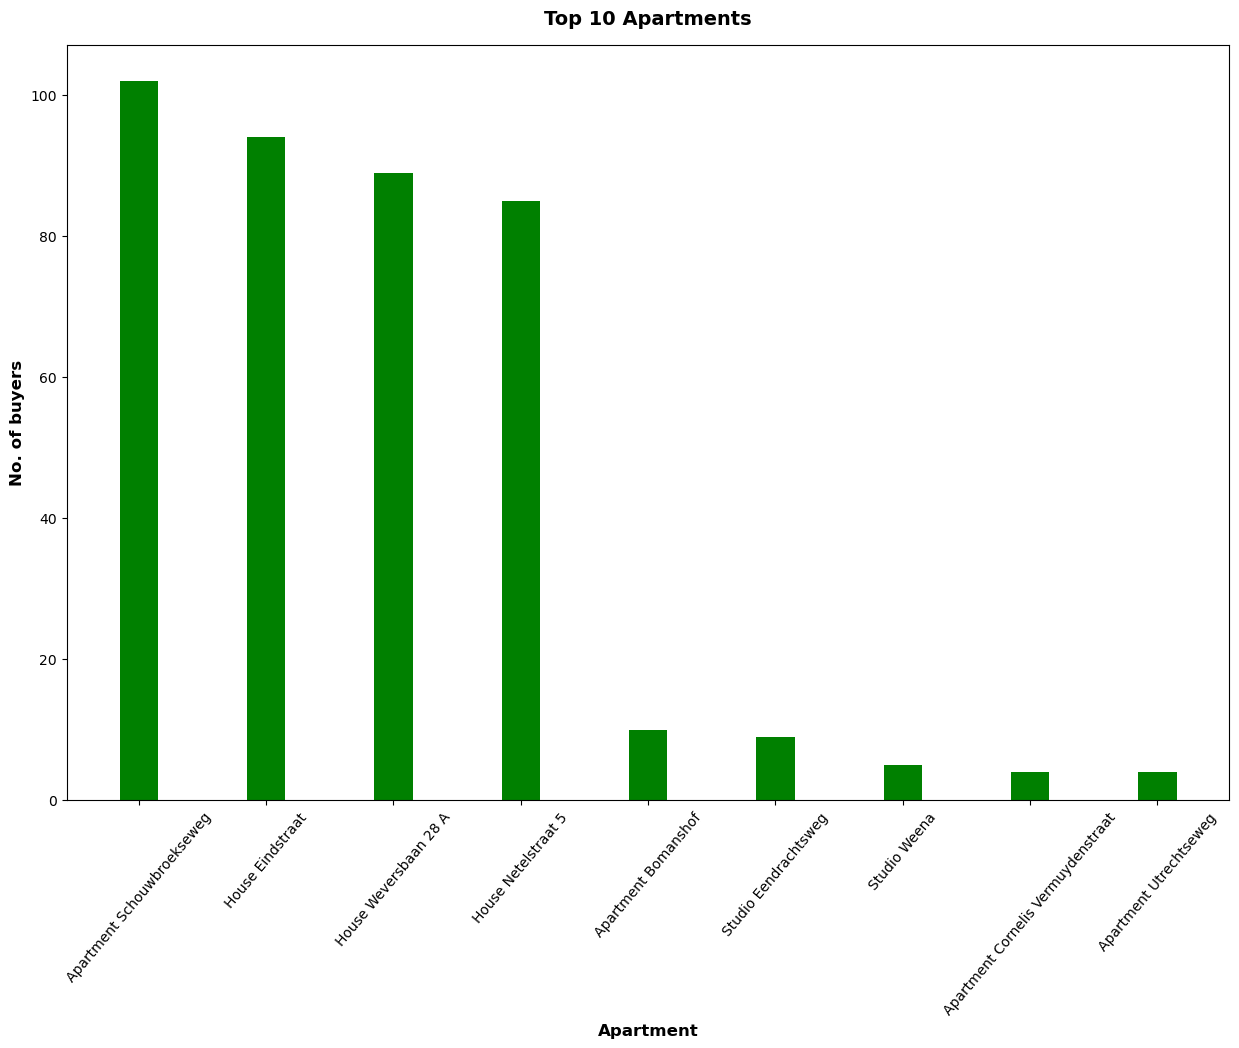

In [28]:
plt.figure(figsize=(15,10), dpi=100)
plt.bar(apartment_, loc_, color='green', width=0.3)
plt.xticks(rotation=50)
plt.xlabel("Apartment", fontsize=12, fontweight='bold')
plt.ylabel("No. of buyers", fontsize=12, fontweight='bold')
plt.title("Top 10 Apartments", fontsize=14, fontweight='bold', pad=15)